# Imports

`numpy`      package for array handling  
`pandas`     import to create and modify dataframes     
`matplotlib` package for data visulization  
`seaborn`    build on matploblib, higher level graph functions

In [1]:
# Imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
Here we are taking the inbuilt function of keras to load the data from the server  
The dataset file in present in the [Link to dataset in amazon server](https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz)  
The inbuilt code 
```python
def load_data(label_mode='fine'):
    """Loads CIFAR100 dataset.
    # Arguments
        label_mode: one of "fine", "coarse".
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    # Raises
        ValueError: in case of invalid `label_mode`.
    """
    if label_mode not in ['fine', 'coarse']:
        raise ValueError('`label_mode` must be one of `"fine"`, `"coarse"`.')

    dirname = 'cifar-100-python'
    origin = 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
    path = get_file(dirname, origin=origin, untar=True)

    fpath = os.path.join(path, 'train')
    x_train, y_train = load_batch(fpath, label_key=label_mode + '_labels')

    fpath = os.path.join(path, 'test')
    x_test, y_test = load_batch(fpath, label_key=label_mode + '_labels')

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)
```
## Regarding Dataset
cifar100 (Canadian Institute For Advanced Research) is dataset of 100 objectst namely

| Superclass                   | Classes                                              |
|:----------------------------:|:----------------------------------------------------:| 
|aquatic mammals               | beaver, dolphin, otter, seal, whale                  | 
|fish                          | aquarium fish, flatfish, ray, shark, trout           | 
|flowers                       | orchids, poppies, roses, sunflowers, tulips          |
|food containers               | bottles, bowls, cans, cups, plates                   |
|fruit and vegetables          | apples, mushrooms, oranges, pears, sweet peppers     |
|household electrical devices  | clock, computer keyboard, lamp, telephone, television|
|household furniture           | bed, chair, couch, table, wardrobe                   |
|insects                       | bee, beetle, butterfly, caterpillar, cockroach       |
|large carnivores              | bear, leopard, lion, tiger, wolf                     |
|large man-made outdoor things | bridge, castle, house, road, skyscraper              |
|large natural outdoor scenes  | cloud, forest, mountain, plain, sea                  |
|large omnivores and herbivores| camel, cattle, chimpanzee, elephant, kangaroo        |
|medium-sized mammals          | fox, porcupine, possum, raccoon, skunk               |
|non-insect invertebrates	   | crab, lobster, snail, spider, worm                   |
|people                        | baby, boy, girl, man, woman                          |
|reptiles                      | crocodile, dinosaur, lizard, snake, turtle           |
|small mammals                 | hamster, mouse, rabbit, shrew, squirrel              | 
|trees                         | maple, oak, palm, pine, willow                       |
|vehicles 1                    | bicycle, bus, motorcycle, pickup truck, train        |
|vehicles 2                    | lawn-mower, rocket, streetcar, tank, tractor         |

[official Link](https://www.cs.toronto.edu/~kriz/cifar.html)   
`Line 4` : created a dictionary with respective labels

In [5]:
# Loading the dataset
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
#cifar10_labels_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

# Understand the dataset
Let see the size and shape of test and training tuples

``On Execution``  
There will be 50000 samples of 28*28 resolution of images in training set  
There will be 10000 samples of 28*28 resolution of images in testing set

In [7]:
# Understanding the data
print("The number of training samples",len(x_train))
print("The number of testing samples",len(x_test))
print("The shape of training samples array",np.shape(x_train))
print("The shape of training samples labels", np.shape(y_train))

The number of training samples 50000
The number of testing samples 10000
The shape of training samples array (50000, 32, 32, 3)
The shape of training samples labels (50000, 1)


# Visualizing the data
Let us try to visualise the few samples of data so, we could get an idea of how the data looks like  
`On Execution`  
We can see ten images of 

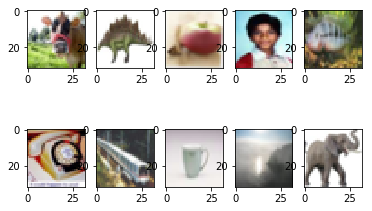

first ten labels
Label value : 19
Label value : 29
Label value : 0
Label value : 11
Label value : 1
Label value : 86
Label value : 90
Label value : 28
Label value : 23
Label value : 31


In [8]:
# Visualizing the data
fig, ax = plt.subplots(nrows=2, ncols=5)
index = 0
for row in ax:
    for col in row:
        #col.set_title(cifar10_labels_dict[y_train[index][0]])
        col.imshow(x_train[index])
        index+=1
plt.show()

print("first ten labels")
for i in range(0,10):
    print("Label value :",y_train[i][0])
    #print("Object Name :",cifar10_labels_dict[y_train[i][0]])

# Preprocessing the data

## Vairables
`image_width`,`image_height`,`image_channels` would describe the dimentions of the image  
`classes` to detemine how many catogories of samples present in out dataset. By nature mnist have 0-9 images to ten classes  

## Creating sparse vector representation
`to_categorical` is converting into one hot encoding. Means each vector is represented by one hot encoding.
0 --> [1,0,0,0,0,0,0,0,0,0]   
1 --> [0,1,0,0,0,0,0,0,0,0]  
2 --> [0,0,1,0,0,0,0,0,0,0]   
and similarly goes on 

`np.expand_dims` would just increst one dimentions in the end. Like .... [1,2,3] to [[1],[2],[3]]  

## Normalization
`Line16`,`Line17`is normalization we are divinding all the pixal values by 255. so all the numerical values are converted between 0 and 1
>Note: since its a simple dataset there is not much of processing required to attain good accuracies. For all real time datasest preprocessing like normalizing , standadising , on hot encoding, filling the missing values, transforming features, feeding the data in batches and all other type of preprocessing is required


In [9]:
# Preprocessing the data

## Variables
image_width = 32
image_height = 32
image_channels = 3 
image_shape = (image_width,image_height,image_channels)


## Creating sparse vector representation
from keras.utils import to_categorical
y_train_sparse = to_categorical(y_train)
y_test_sparse = to_categorical(y_test)

## Normalization
x_train  = x_train /255
x_test = x_test /255

# Training varibles
These Training varbles are hyper parameters for neural network training.   
`epochs` : each epoch is forward propagation + backward propagation over the whole dataset once is called one epoch.  
`learning_rate` : the magnitude in which the weights are modified one the acquired loss.   
`learning_rate_decay` : there can be high leanring rate at the beining of the training when the loss is high. Over a period of time the learning rate can reduce for fine training of network.  
`batch_size` : the data is fed to the network in batches of 32 samples at each time. This batch feeding is done all over the whole dataset.  

In [11]:
# Training varibles
classes = 100
epochs = 20
learning_rate = 0.05
learning_rate_decay = 0.0001
batch_size = 32

# Neural Netowork Model
`Line 6` : we are building a keras sequential model  
`Line 32` : we are using stochastic gradient decent optimizer  
`Line 36` : compiling the model to check if the model is build properly.  

The loss function being used is `categorical_crossentropy` since its a multi class classification


In [14]:

# Buliding the model 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.optimizers import SGD

model = Sequential()

# Layer 1
model.add(Conv2D(filters = 512, kernel_size = (3,3), strides = (1, 1), padding = 'valid', data_format = "channels_last",input_shape = image_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Layer 2
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1, 1), padding = 'valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Layer 3
model.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1, 1), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
    
# Layer 4
model.add(Flatten(data_format = "channels_last"))
model.add(Dense(2048))
model.add(Activation("relu"))

# Layer 5
model.add(Dense(1024))
model.add(Activation("relu"))

# Layer 6
model.add(Dense(100,activation="softmax"))

sgd_optimizers = SGD(lr=learning_rate,decay=learning_rate_decay)

model.compile(optimizer = sgd_optimizers, loss=['categorical_crossentropy'], metrics=['accuracy'])


# Training 
Training is the process of feeding the data to neural network and modifiying the weights of the model using the the backpropagation algorithm. The backpropagation using loss the function acquires the loss over batch size of data and does a backpropagation to modify the weights in such a way the in the next epoch the loss would be less when compared to the current epoch

In [15]:
# Training the model
model_history = model.fit(x=x_train, y=y_train_sparse, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test_sparse), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 43s 858us/step - loss: 4.3596 - acc: 0.0361 - val_loss: 4.0664 - val_acc: 0.0688
Epoch 2/20
50000/50000 [==============================] - 40s 794us/step - loss: 3.8448 - acc: 0.1068 - val_loss: 3.6495 - val_acc: 0.1400
Epoch 3/20
50000/50000 [==============================] - 40s 794us/step - loss: 3.5461 - acc: 0.1565 - val_loss: 3.4467 - val_acc: 0.1726
Epoch 4/20
50000/50000 [==============================] - 40s 795us/step - loss: 3.3219 - acc: 0.1983 - val_loss: 3.1881 - val_acc: 0.2346
Epoch 5/20
50000/50000 [==============================] - 40s 798us/step - loss: 3.1408 - acc: 0.2289 - val_loss: 3.0530 - val_acc: 0.2465
Epoch 6/20
50000/50000 [==============================] - 40s 797us/step - loss: 2.9827 - acc: 0.2609 - val_loss: 2.9314 - val_acc: 0.2754
Epoch 7/20
50000/50000 [==============================] - 41s 830us/step - loss: 2.8493 - acc: 0.2868 - val_loss: 2.

# Results
using the trained model we try to predict what are the values of images in the test set

In [22]:
# Results
y_pred = model.predict(x=x_test, batch_size=batch_size, verbose=1)

10000/10000 [==============================] - 3s 279us/step


# Verifying the results
cheking the results how good they are with the first 10 samples.   
Plotting the graphs of test and train set accuracies and loss values. 
> NOTE: This plot is a very curicial step. These plots would tell us how good the model converges and if there is any overfitting

Ground truths of first 10 images in test set [49 33 72 51 71 92 15 14 23  0]
Predicted values of first 10 image in test set [85 80 29 51 71 79 38 63 23  9]


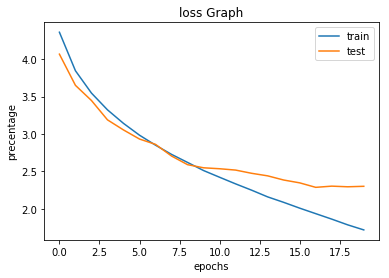

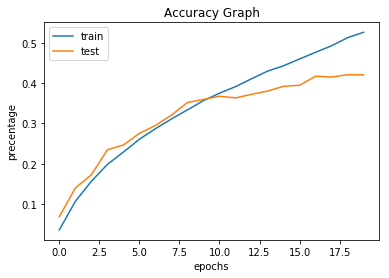

In [23]:
# Verifying the results
print("Ground truths of first 10 images in test set",np.array(y_test[0:10]))
print("Predicted values of first 10 image in test set",np.argmax(y_pred[0:10],axis=1))

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss,label='train')
plt.plot(val_loss,label='test')
plt.title('loss Graph')
plt.ylabel('precentage')
plt.xlabel('epochs')
plt.legend()
plt.show()

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
plt.plot(acc,label='train')
plt.plot(val_acc,label='test')
plt.title('Accuracy Graph')
plt.ylabel('precentage')
plt.xlabel('epochs')
plt.legend()
plt.show()

# Visulizing the results
checking the results by visulizing them and creating a confusion matrix. The values of precession and accuracy can be obtained by the help of confusion matrix and f1 scores to compare this architecure with other architectures of neural networks

The shape of y_pred is  (10000,)
The shape of y_test is  (10000,)
predicted  0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  \
Actual                                            ...                           
0          70   3   0   0   0   0   1   0   0   1 ...   0   0   3   0   1   0   
1           0  56   0   1   1   0   0   0   0   0 ...   1   1   2   2   0   0   
2           0   0  40   0   0   2   1   0   0   2 ...   0   0   1   0   0   0   
3           0   0   0  27   3   0   2   1   0   2 ...   1   0   0   1   0   1   
4           0   0   0   5  19   0   0   0   1   0 ...   1   1   0   1   0   0   
5           0   0   1   0   0  27   0   0   0   0 ...   0   2   0   0   2   1   
6           0   0   0   4   0   0  53   3   0   0 ...   0   0   1   0   0   0   
7           0   0   0   3   0   0   7  48   1   0 ...   0   0   0   0   0   1   
8           0   0   1   0   0   0   0   0  47   0 ...   0   0   0   0   0   0   
9           0   0   0   1   0   0   1   4  

Text(159.0, 0.5, 'Actaul')

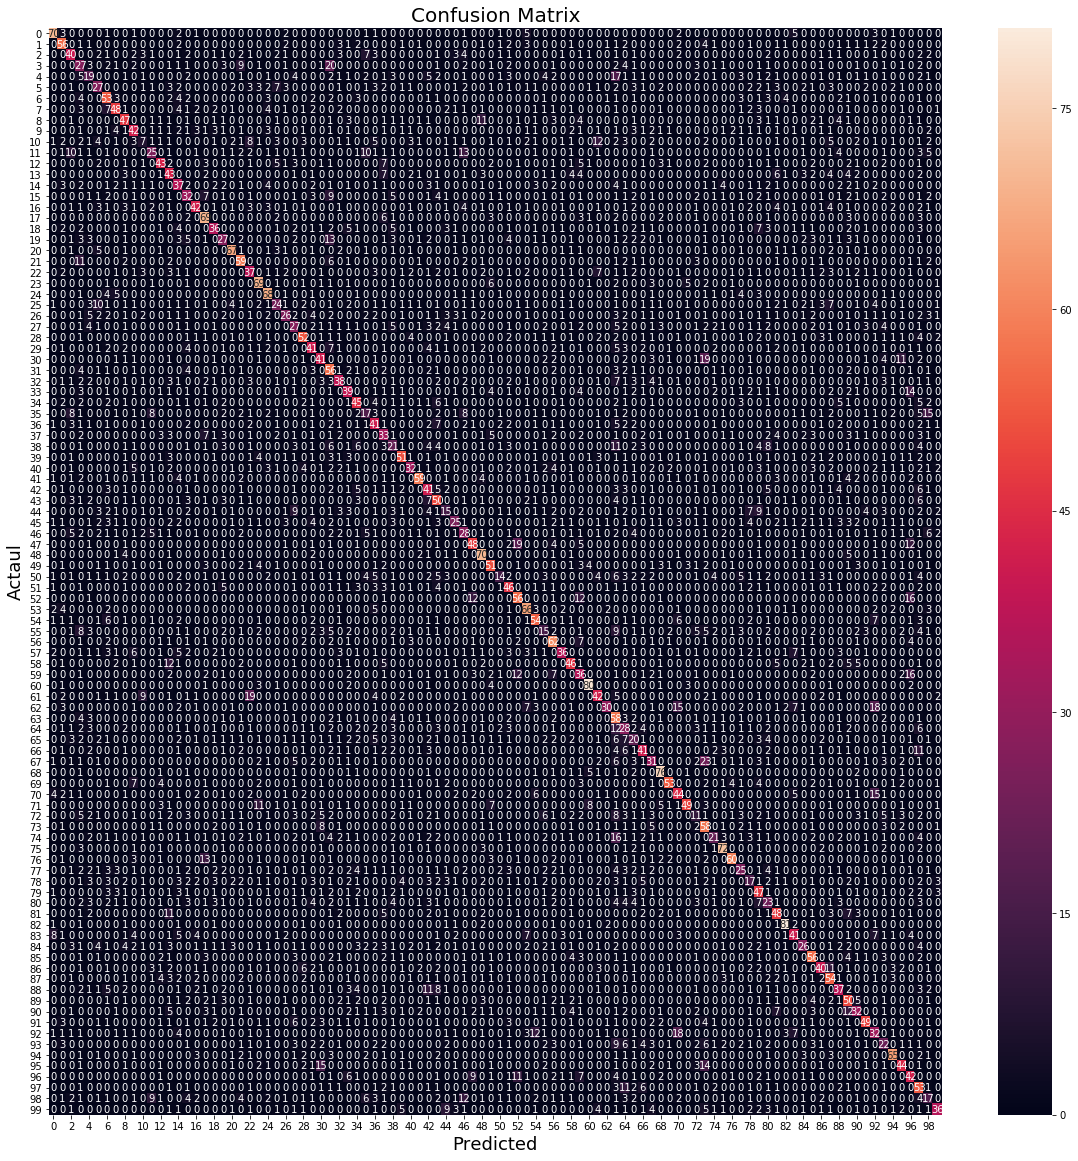

In [24]:
# Visulizing the results
y_pred = np.argmax(y_pred,axis=1)
y_test = y_test.ravel()
print("The shape of y_pred is ",np.shape( y_pred))
print("The shape of y_test is ",np.shape(y_test))
y_pred = pd.Series(y_pred,name = "predicted")
y_test = pd.Series(y_test,name = "Actual")
df_confusion  = pd.crosstab(y_test,y_pred)
#df_confusion.columns = [i for i in list(cifar10_labels_dict.values())]
#df_confusion.index = [i for i in list(cifar10_labels_dict.values())]

print(df_confusion)
plt.figure(figsize = (20,20))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(df_confusion, annot=True,fmt="d")
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actaul', fontsize=18)